In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv("clean_jobs.csv")
df.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


**Cleaning description**

In [3]:
# Define basic stopwords
basic_stopwords = set([
    'a', 'an', 'the', 'in', 'on', 'and', 'or', 'for', 'to', 'with', 'at', 'by',
    'of', 'is', 'it', 'this', 'that', 'from', 'as', 'are', 'was', 'were', 'be',
    'have', 'has', 'had', 'will', 'would', 'can', 'could', 'should', 'you', 'we',
    'they', 'i', 'he', 'she', 'but', 'about', 'into', 'no', 'not', 'so', 'if', 'out'
])


In [4]:
# Define the cleaning function
def clean_text_simple(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    # Remove HTML
    text = re.sub(r'<.*?>', ' ', text)
    # Remove punctuation/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in basic_stopwords]
    return ' '.join(tokens)

In [5]:
df['clean_description'] = df['description'].apply(clean_text_simple)

print(df[['title', 'clean_description']].head())

             title                                  clean_description
0     Data Analyst  social measurement team growing team highvisib...
1     Data Analyst  social measurement team growing team highvisib...
2     Data Analyst  social measurement team growing team highvisib...
3     Data Analyst  social measurement team growing team highvisib...
4  Data Analyst II  pinterest millions people around world come ou...


**NLP Skill Exactraction using spaCy**

In [6]:
get_ipython().system('pip install spacy')
get_ipython().system('python -m spacy download en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [14]:
skill_keywords = set(["python", "sql", "excel", "tableau", "powerbi", "pandas", "numpy",
    "scikit", "matplotlib", "seaborn", "keras", "tensorflow", "spark",
    "aws", "azure", "git", "docker", "hadoop", "airflow"

])

In [15]:
#Extact skills from cleaned text

def extract_skills(text):
  doc = nlp(text)
  extracted = set()
  for token in doc:
    if token.pos_ in("NOUN","PREPN","VERB"):
      word = token.text.lower()
      if word in skill_keywords:
        extracted.add(word)
  return list(extracted)

In [17]:
df['extracted_skills'] = df['clean_description'].apply(extract_skills)

print(df[['title', 'extracted_skills']].head(10))

                                               title  \
0                                       Data Analyst   
1                                       Data Analyst   
2                                       Data Analyst   
3                                       Data Analyst   
4                                    Data Analyst II   
5                                       Data Analyst   
6  Data Analyst, Production Finance Operations & ...   
7                           Data Analyst - Marketing   
8                                       Data Analyst   
9                                    Data Analyst II   

                extracted_skills  
0              [tableau, python]  
1              [tableau, python]  
2              [tableau, python]  
3              [tableau, python]  
4                             []  
5  [sql, tableau, python, excel]  
6                          [sql]  
7           [sql, python, excel]  
8                             []  
9                             [] 

In [18]:
for sublist in df['extracted_skills']:
  print("Sublist:", sublist)
  for skill in sublist:
    print("Skill:", skill)

Sublist: ['tableau', 'python']
Skill: tableau
Skill: python
Sublist: ['tableau', 'python']
Skill: tableau
Skill: python
Sublist: ['tableau', 'python']
Skill: tableau
Skill: python
Sublist: ['tableau', 'python']
Skill: tableau
Skill: python
Sublist: []
Sublist: ['sql', 'tableau', 'python', 'excel']
Skill: sql
Skill: tableau
Skill: python
Skill: excel
Sublist: ['sql']
Skill: sql
Sublist: ['sql', 'python', 'excel']
Skill: sql
Skill: python
Skill: excel
Sublist: []
Sublist: []
Sublist: []
Sublist: []
Sublist: ['sql', 'tableau', 'python', 'excel']
Skill: sql
Skill: tableau
Skill: python
Skill: excel
Sublist: ['tableau', 'excel']
Skill: tableau
Skill: excel
Sublist: []
Sublist: ['sql', 'spark']
Skill: sql
Skill: spark
Sublist: ['excel', 'powerbi']
Skill: excel
Skill: powerbi
Sublist: []
Sublist: ['tableau']
Skill: tableau
Sublist: ['tableau', 'python']
Skill: tableau
Skill: python
Sublist: ['sql', 'python']
Skill: sql
Skill: python
Sublist: []
Sublist: ['python']
Skill: python
Sublist: ['pyt

**Analyse & Visualize Skill Frequency**

In [20]:
import matplotlib.pyplot as plt
from collections import Counter

In [22]:
# Flatten list of lists into one big list of all skills

all_skills = [skill for sublist in df['extracted_skills'] for skill in sublist]

skill_count = Counter(all_skills)

top_skills = skill_count.most_common(10)

skills,counts = zip(*top_skills)

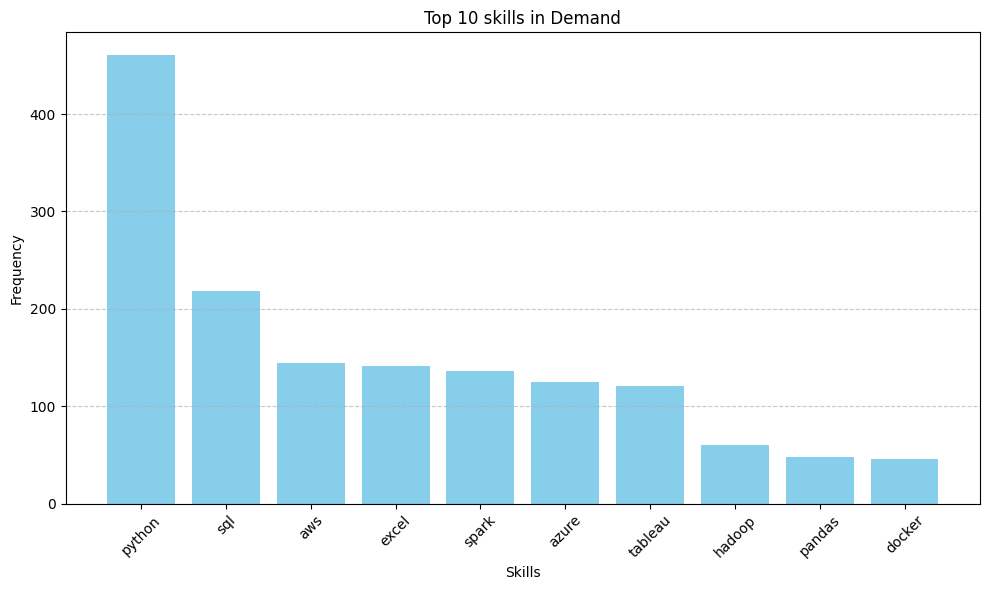

In [25]:
#Plotting the skills and it's frequency

plt.figure(figsize=(10,6))
plt.bar(skills,counts, color='skyblue')
plt.title("Top 10 skills in Demand")
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Grouping Skills by Job or Comapany**

In [26]:
from collections import defaultdict

In [30]:
skills_by_title = defaultdict(Counter)

for index,row in df.iterrows():
  job_title = row['title'].lower()
  for skill in row['extracted_skills']:
    skills_by_title[job_title][skill] += 1

print(skills_by_title)
print(skills_by_title['data scientist'].most_common(10))



defaultdict(<class 'collections.Counter'>, {'data analyst': Counter({'python': 55, 'sql': 54, 'excel': 46, 'tableau': 33, 'powerbi': 10, 'aws': 10, 'azure': 9, 'spark': 8, 'hadoop': 5, 'pandas': 3, 'git': 2}), 'data analyst, production finance operations & innovation': Counter({'sql': 1}), 'data analyst - marketing': Counter({'sql': 1, 'python': 1, 'excel': 1}), 'data products analyst, youtube': Counter({'sql': 5, 'spark': 5, 'python': 1}), 'customer relationship management analyst': Counter({'excel': 1, 'powerbi': 1}), 'marketing data analyst': Counter({'tableau': 1, 'excel': 1, 'python': 1}), 'analytics associate': Counter({'sql': 1, 'python': 1}), 'data & analytics, analyst': Counter({'python': 2}), 'junior data analyst - remote': Counter({'python': 1, 'excel': 1}), 'people data analyst': Counter({'python': 1, 'excel': 1}), 'customer insights analyst': Counter({'python': 1, 'sql': 1}), 'data analyst intern (fall start)': Counter({'excel': 1}), 'analyst, data science, rmbs': Counter(

**Visualizing top skills per Job**

<function matplotlib.pyplot.show(close=None, block=None)>

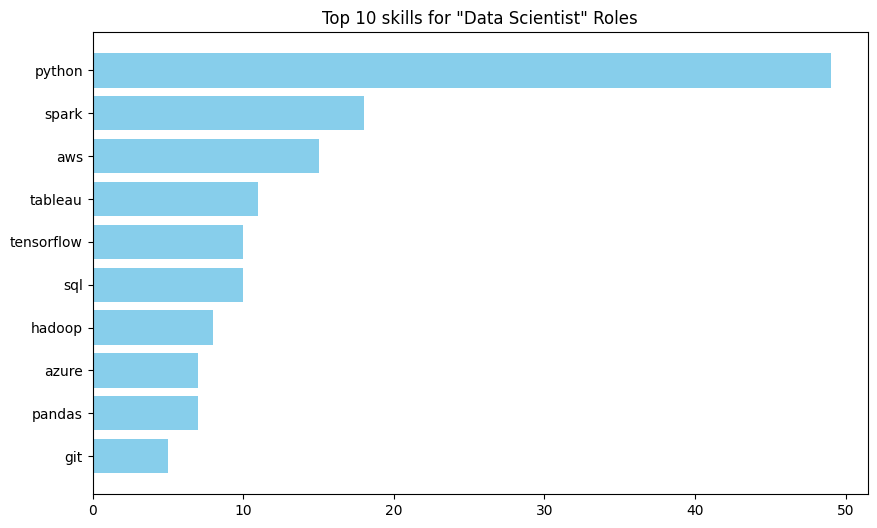

In [33]:
job_title = 'data scientist'

top_skills = skills_by_title['data scientist'].most_common(10)
skills,counts = zip(*top_skills)

#plot

plt.figure(figsize = (10,6))
plt.barh(skills,counts, color='skyblue')
plt.title(f'Top 10 skills for "{job_title.title()}" Roles')
plt.gca().invert_yaxis()
plt.tight_layout
plt.show